<a href="https://colab.research.google.com/github/x1001000/Learn_Deep_Learning_Deep/blob/master/neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

- 資料都是數據化的多維陣列  
資料常要視覺化以幫助理解

- 匯入多維陣列運算要用的函式庫 numpy，以下簡稱為 np  
匯入作圖要用的函式庫 matplotlib.pyplot，以下簡稱為 plt

In [0]:
import numpy as np
import matplotlib.pyplot as plt

- 串列(list)與陣列(array)的元素，皆有序可供索引  
串列的元素可以不同類別  
陣列的元素必須相同類別，儲存在記憶體的一段連續位址上

- 複習一下串列

In [2]:
a = [ [3,4,5,6], [7,8,9,0] ]
print(type(a))
print(len(a))

<class 'list'>
2


- 陣列 = np.array(串列)

- 陣列 aka 張量  
矩陣 aka 二維張量  
向量 aka 一維張量

- 查看陣列的形狀(shape)及維度(ndim)

In [3]:
a = np.array( [a,a,a,a,a] )
print(type(a))
print(len(a))
print(a.shape)
print(a.ndim)

<class 'numpy.ndarray'>
5
(5, 2, 4)
3


# Linear Regression

- 線性迴歸就是求最接近全部樣本的一個線性函數

- 用一個極簡的例子來理解何謂訓練神經元(線性迴歸)  
用五筆x(feature)及其y(label)，反覆更新w(weight)和b(bias)，使得線性函數y=wx+b更接近這五個資料點

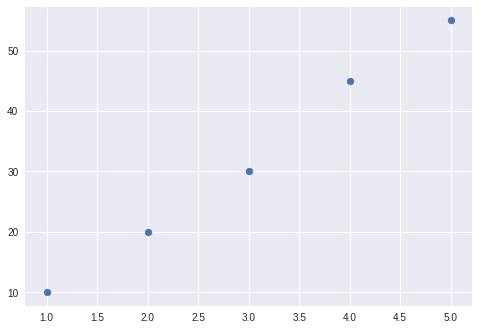

In [4]:
x = np.array( [1,2,3,4,5]      )
y = np.array( [10,20,30,45,55] )
plt.scatter(x,y)

# Model

- 初學者用高階的Keras函式庫(之後再用TensorFlow函式庫)  
初學者用順序式模型(之後再用函數式模型)

In [5]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


- Dense(全連接)層的三個引數：  
輸出y為一維的向量，故只需units=1個神經元  
輸入x為一維的向量，故這個Dense層的input_dim=1  
激活函數activation=None，讓y直接等於f(x)

In [0]:
from keras.layers import Dense
model.add(Dense(units=1, input_dim=1, activation=None))

- 列出神經網路架構  
這個極簡的例子只有一個神經元，只訓練到w和b兩個模型參數

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- [Before training a model, you need to configure the learning process, which is done via the compile method.](https://keras.io/getting-started/sequential-model-guide/)

- 模型參數的誤差函數Loss(w,b)的算法，採用MSE(均方誤差法)  
模型參數w和b的最佳解的找法，採用SGD(隨機梯度下降法)

In [0]:
model.compile(loss='MSE',
              optimizer='SGD')

# Train

- 訓練10個回合(epochs)
- 看w和b

In [9]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 161ms/step - loss: 1000.9489
Epoch 2/10
5/5 [==============================] - 0s 817us/step - loss: 585.7585
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 343.7939
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 202.7766
Epoch 5/10
5/5 [==============================] - 0s 647us/step - loss: 120.5865
Epoch 6/10
5/5 [==============================] - 0s 730us/step - loss: 72.6781
Epoch 7/10
5/5 [==============================] - 0s 542us/step - loss: 44.7474
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 28.4589
Epoch 9/10
5/5 [==============================] - 0s 942us/step - loss: 18.9548
Epoch 10/10
5/5 [==============================] - 0s 701us/step - loss: 13.4046


In [10]:
w, b = model.layers[0].get_weights()
print('w =', w[0,0])
print('b =', b[0])

w = 9.581167
b = 2.118669


- 再訓練10個回合(epochs)
- 再看w和b

In [11]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 665us/step - loss: 10.1585
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 8.2552
Epoch 3/10
5/5 [==============================] - 0s 927us/step - loss: 7.1345
Epoch 4/10
5/5 [==============================] - 0s 515us/step - loss: 6.4700
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 6.0713
Epoch 6/10
5/5 [==============================] - 0s 574us/step - loss: 5.8277
Epoch 7/10
5/5 [==============================] - 0s 931us/step - loss: 5.6745
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 5.5741
Epoch 9/10
5/5 [==============================] - 0s 832us/step - loss: 5.5045
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 5.4529


In [12]:
w, b = model.layers[0].get_weights()
print('w =', w[0,0])
print('b =', b[0])

w = 10.179333
b = 2.1128519


# Inference

- 用訓練過的模型/網路做預測  
輸入訓練用的feature，輸出結果應該很接近但不會剛好等於label

In [13]:
model.predict(x)

array([[12.292185],
       [22.471518],
       [32.65085 ],
       [42.83018 ],
       [53.009514]], dtype=float32)

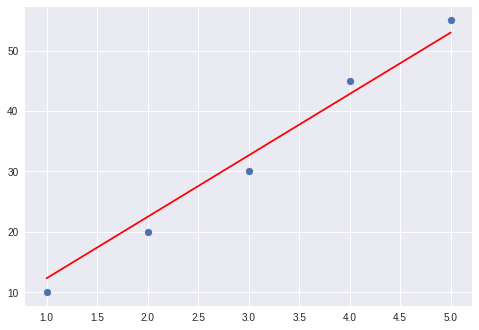

In [14]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')